<h2 style=" text-align:  center; color: cyan; background-color: black;"> Importations des dépendances dont on aura besoin</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<h2 style=" text-align:  center; color: cyan; background-color: black;">Collecte de données</h2>

In [2]:
data = pd.read_excel("Online Retail.xlsx", sheet_name= 'Online Retail')

<h2 style=" text-align:  center; color: cyan; background-color: black;">Exploration de données (EDA)</h2>

In [3]:
# Affichage du jeu de données (les 5 premiers lignes et es 5 derniers lignes du jeu de données)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
# Nombre de lignes et de colonnes
nbrows, nbcol = data.shape
print(f'Notre jeu de données contient {nbrows} lignes et {nbcol} colonnes.')

Notre jeu de données contient 541909 lignes et 8 colonnes.


In [5]:
# Affichage des informations sur notre jeu de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Visualisation de la statistique descriptive de la donnée avant le prétraitement
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<h2 style=" text-align:  center; color: cyan; background-color: black;">Prétraitement des données</h2>

In [7]:
#Gestion des entrées dupliquées avant de les supprimeer
data.duplicated().sum()

5268

In [8]:
#Suppression des données dupliquées
data.drop_duplicates(inplace= True)

In [9]:
#Nombres de données dupliquéees après gestion
data.duplicated().sum()

0

In [10]:
# Nombre de lignes et de colonnes après gestion des entrées dupliquées
nbrows, nbcol = data.shape
print(f'Notre jeu de données contient {nbrows} lignes et {nbcol} colonnes.')

Notre jeu de données contient 536641 lignes et 8 colonnes.


#### Ainsi nous constatons que la gestion des entrées dupliquées nous a donné une réduction du nombre de lignes

In [11]:
# Gestion des données null ou abérrantes
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [12]:
# Suppression des données null ou abérrantes
data.dropna(inplace= True)

In [13]:
# Revérification des données null ou abérrantes
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
# Nombre de lignes et de colonnes après gestion des valeurs manquantes
nbrows, nbcol = data.shape
print(f'Notre jeu de données contient {nbrows} lignes et {nbcol} colonnes.')

Notre jeu de données contient 401604 lignes et 8 colonnes.


#### Encore une fois la gestion des données manquantes à considerablement réduit notre jeu de données

In [15]:
# En parcourant le fichier on remarque quee dans la colonne InvoiceNo il y a 'C' au début de certains donc on va le gérer
# En utilisant l'operateur (~) on peut déselectionner toutes la colonne de Invoice qui contient "C"
data = data[~data.InvoiceNo.str.contains('C',na=False)]

#### Maintenant que c'est fait, changeons les données aux bons formats

In [16]:
# changeement du types de certains variables
data["CustomerID"] = data["CustomerID"].astype(dtype="int")
data["InvoiceNo"] = data["InvoiceNo"].astype(dtype="int")

/var/folders/_t/cdg3gp2d21ngl51h05022cmh0000gn/T/ipykernel_1454/1321777259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CustomerID"] = data["CustomerID"].astype(dtype="int")
/var/folders/_t/cdg3gp2d21ngl51h05022cmh0000gn/T/ipykernel_1454/1321777259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["InvoiceNo"] = data["InvoiceNo"].astype(dtype="int")


In [17]:
#### Regardons le type de nos données
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int64         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.0+ MB


In [18]:
# un petit résumé statistique sur notre données enfin traitées
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000,392732.000000
mean,560591.072436,13.153718,3.125596,15287.734822
std,13087.116747,181.588420,22.240725,1713.567773
min,536365.000000,1.000000,0.000000,12346.000000
25%,549234.000000,2.000000,1.250000,13955.000000
50%,561874.000000,6.000000,1.950000,15150.000000
75%,572061.000000,12.000000,3.750000,16791.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


#### Notre donnée est enfin prêt pour être utiliser 🤗

<h2 style=" text-align:  center; color: cyan; background-color: black;">Ingénierie des caractéristiques</h2>

#### 💡 L'ingénierie des caractérisques consiste à créer de nouvelles caractérisques nécessaire pour pouvoir segmenter notre donnée.

In [19]:
## Pour avoir la derniere date de transaction
#Le montant total dépensé
data['Total'] = data['Quantity'] * data['UnitPrice']
#la fréquence d'achat pour chaque client
data["Frequence"] = data.groupby("CustomerID")["InvoiceNo"].transform("nunique")
#le montant total dépensé par chaque client
data["TotalSpent"] = data.groupby("CustomerID")["Total"].transform("sum")
# Recency est le nombre de jours écoulés depuis la dernière transaction d'un client
#Pour ne pas avoir d'ambiguité on fixe une date supérieure à la date maximale de notre dataset qui est 09-12-2011
data["Recency"] = (pd.to_datetime("2011-12-10") - data["InvoiceDate"]).dt.days
# Monetary est le montant total dépensé par un client par mois
data["Monetary"] = data["TotalSpent"] / (data["InvoiceDate"].dt.month - data["InvoiceDate"].dt.month.min() + 1)

Seg = data[['Recency','Frequence','Monetary','TotalSpent']]

/var/folders/_t/cdg3gp2d21ngl51h05022cmh0000gn/T/ipykernel_1454/1797039578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total'] = data['Quantity'] * data['UnitPrice']
/var/folders/_t/cdg3gp2d21ngl51h05022cmh0000gn/T/ipykernel_1454/1797039578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Frequence"] = data.groupby("CustomerID")["InvoiceNo"].transform("nunique")
/var/folders/_t/cdg3gp2d21ngl51h05022cmh0000gn/T/ipykernel_1454/1797039578.py:7: SettingWithCopyWarning: 
A value is trying 

<h2 style=" text-align:  center; color: cyan; background-color: black;">Segmentation de la clientèle</h2>

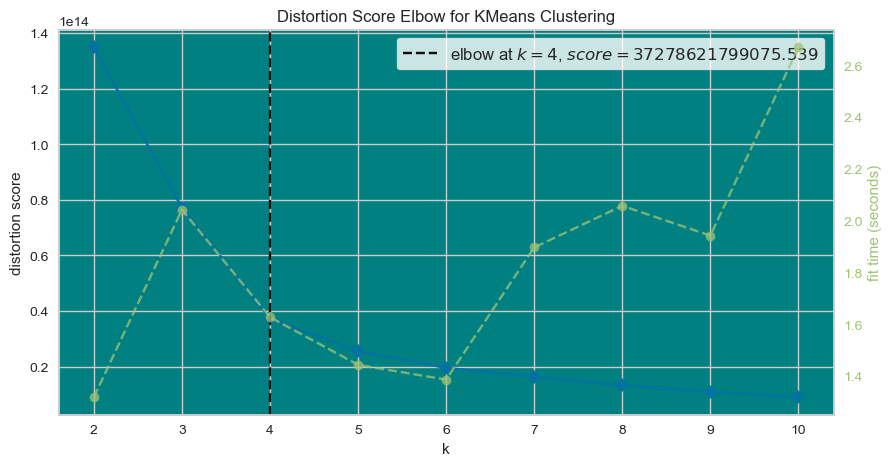

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Pour trouver la valeur K pour le nombre de cluster avec la methode du coude (Elbow)
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("teal")
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(Seg)
Elbow_M.show()

#### Ainsi nous voyons que le nombre de clusters qui nous faut est 4 car on a un bon résultat avec ce nombre 😌

In [21]:
# Entrainement du modèle avec KMeans
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(Seg)

KMeans(max_iter=50, n_clusters=4)

<p style= "color:black;font-size:20px;text-align:center;">Le cœfficient de silhouette ou le score de silhouettee est une mesure utilisée pour calculer la qualité d'une technique de clustering. Sa valeur varie de -1 à 1. Plus le score est proche de 1, plus le cluster est distingué.
Dans notre cas, le calcul du score de silhouette prend trop de temps donc on va commenter cette partie ci-dessous.</p>

In [25]:

# Calculons le score de silhouette pour chaque cluster
# from sklearn.metrics import silhouette_score

# silhouette_scores = silhouette_score(Seg, kmeans.labels_, metric= 'euclidean')'''


#### Vu qu'on a entrainé notre modèle, on peut passer maintenant à la visualisation des Segments

<h2 style=" text-align:  center; color: cyan; background-color: black;">Visualisation des Segments📊</h2>


#### Pour ce faire on va utiliser un diagramme de dispersion pour visualiser nos segments

/var/folders/_t/cdg3gp2d21ngl51h05022cmh0000gn/T/ipykernel_1454/1844556865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Seg['Clusters'] = kmeans.labels_


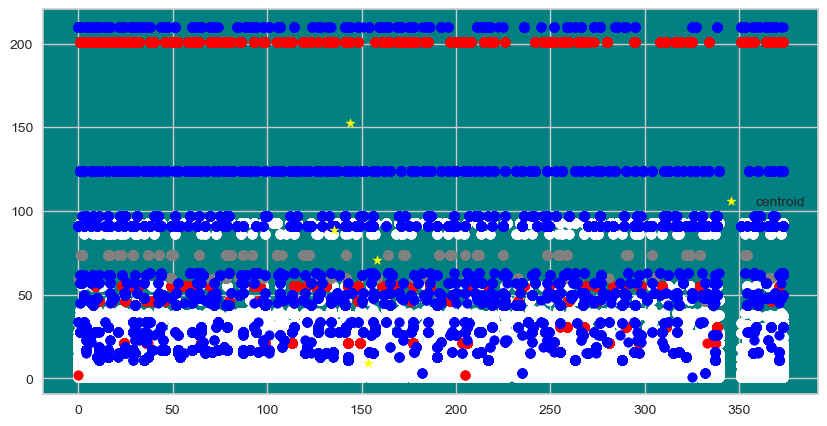

In [28]:
#Regroupement des données selon chaque cluster séparement
Seg['Clusters'] = kmeans.labels_
one = Seg[Seg["Clusters"]==0]
two = Seg[Seg["Clusters"]==1]
three = Seg[Seg["Clusters"]==2]
four = Seg[Seg["Clusters"]==3]

# Visualisez les segments à l'aide d'un diagramme de dispersion
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("teal")
plt.scatter(one["Recency"],one["Frequence"],color='white')
plt.scatter(two["Recency"],two["Frequence"],color='red')
plt.scatter(three["Recency"],three["Frequence"],color='grey')
plt.scatter(four["Recency"],four["Frequence"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show()

<h2 style=" text-align:  center; color: cyan; background-color: black;">Analyse des Segments📊</h2>

On constate que ceux du cluster 1 abondent plus que les autres suivi de ceux du  dernier cluster avec des dépenses totalement haut et à pas couvrant la fréquence.